In [29]:
%pip install scipy
import kagglehub
import pandas as pd
import os 
import seaborn as sns 
from scipy.stats import linregress

# Download latest version
path = kagglehub.dataset_download("bhadramohit/climate-change-dataset")
file_path = os.path.join(path, "climate_change_dataset.csv") 

print("Path to dataset files:", path)
df = pd.read_csv(file_path) 
df.head()

# Upload to S3

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/37/20/3d04eb066b471b6e171827548b9ddb3c21c6bbea72a4d84fc5989933910b/scipy-1.15.2-cp312-cp312-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.2/30.2 MB 18.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: /Users/student/.cache/kagglehub/datasets/bhadramohit/climate-change-dataset/versions/1


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [4]:
import math

In [5]:
features = ['Year', 'Country', 'Extreme Weather Events',
             'Avg Temperature (°C)', 'Sea Level Rise (mm)' ]
df_clean_2 = df[features]

df_clean_2.head(10)



,Year,Country,Extreme Weather Events,Avg Temperature (°C),Sea Level Rise (mm)
0,2006,UK,14,8.9,3.1
1,2019,USA,8,31.0,4.2
2,2014,France,9,33.9,2.2
3,2010,Argentina,7,5.9,3.2
4,2007,Germany,4,26.9,2.4
5,2020,China,12,32.3,2.7
6,2006,Argentina,10,30.7,3.9
7,2018,South Africa,1,33.9,4.5
8,2022,UK,4,27.8,1.5
9,2010,Australia,5,18.3,3.5


Top 3 countries with the fastest rising temperatures: ['Canada', 'Mexico', 'Indonesia']


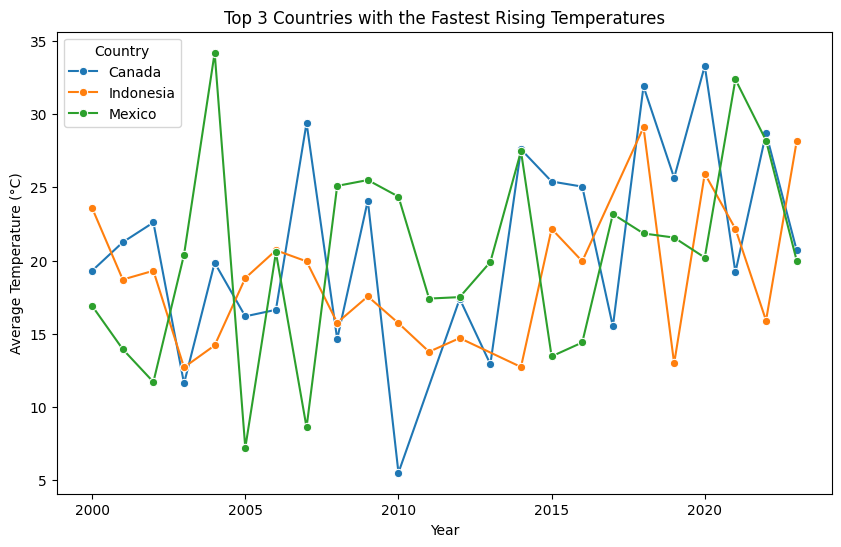

In [31]:
df_temp_trend = df_clean_2.groupby(["Year", "Country"])["Avg Temperature (°C)"].mean().reset_index()

country_slopes = {}

for country in df_temp_trend["Country"].unique():
    temp_data = df_temp_trend[df_temp_trend["Country"] == country]
    
    if len(temp_data) > 1:  # Ensure enough data for trend calculation
        slope, _, _, _, _ = linregress(temp_data["Year"], temp_data["Avg Temperature (°C)"])
        
        if slope > 0:  # Only consider countries with increasing trends
            country_slopes[country] = slope

top_countries = sorted(country_slopes, key=country_slopes.get, reverse=True)[:3]

print("Top 3 countries with the fastest rising temperatures:", top_countries)

if not top_countries:
    print("No countries found with a rising temperature trend.")
else:
    df_top_rising = df_temp_trend[df_temp_trend["Country"].isin(top_countries)]

    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_top_rising, x="Year", y="Avg Temperature (°C)", hue="Country", marker="o")

    plt.xlabel("Year")
    plt.ylabel("Average Temperature (°C)")
    plt.title("Top 3 Countries with the Fastest Rising Temperatures")
    plt.legend(title="Country")
    plt.show()

Top 3 countries with the fastest sea level rise: ['Argentina', 'Mexico', 'France']


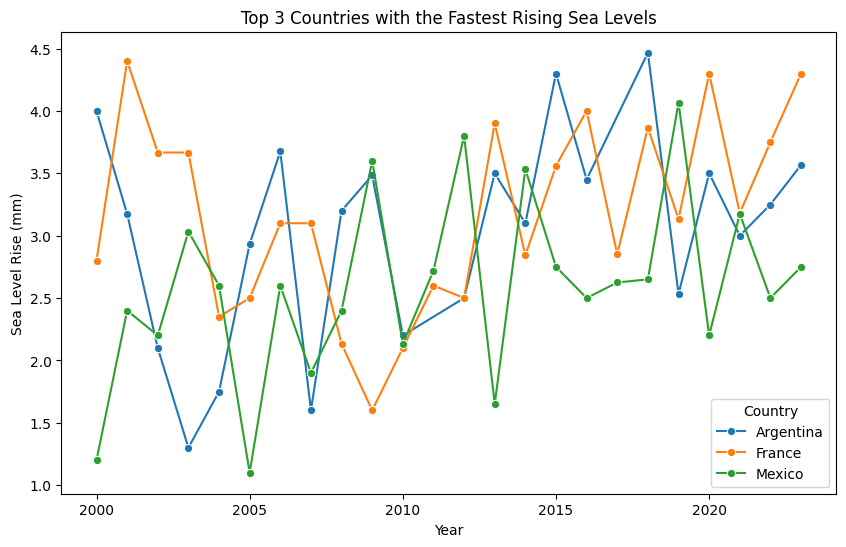

In [32]:
df_sea_level_trend = df_clean_2.groupby(["Year", "Country"])["Sea Level Rise (mm)"].mean().reset_index()

country_slopes = {}

for country in df_sea_level_trend["Country"].unique():
    sea_level_data = df_sea_level_trend[df_sea_level_trend["Country"] == country]
    
    if len(sea_level_data) > 1:  # Ensure enough data for trend calculation
        slope, _, _, _, _ = linregress(sea_level_data["Year"], sea_level_data["Sea Level Rise (mm)"])
        
        if slope > 0:  # Only consider countries with increasing trends
            country_slopes[country] = slope

top_countries = sorted(country_slopes, key=country_slopes.get, reverse=True)[:3]

print("Top 3 countries with the fastest sea level rise:", top_countries)

if not top_countries:
    print("No countries found with a rising sea level trend.")
else:
    df_top_rising_sea = df_sea_level_trend[df_sea_level_trend["Country"].isin(top_countries)]

    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_top_rising_sea, x="Year", y="Sea Level Rise (mm)", hue="Country", marker="o")

    plt.xlabel("Year")
    plt.ylabel("Sea Level Rise (mm)")
    plt.title("Top 3 Countries with the Fastest Rising Sea Levels")
    plt.legend(title="Country")
    plt.show()

In [34]:
country_colors = {
    "USA": "red",
    "China": "blue",
    "France": "green",
    "Indonesia": "purple",
    "Canada": "orange",
    "Argentina": "cyan",
    "Mexico": "pink",
    "Australia": "brown"
}

top_countries_temp = ["USA", "China", "France"]  # Replace with your actual top 3 temp countries
top_countries_sea = ["UK", "Germany", "Argentina"]  # Replace with your actual top 3 sea level countries

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top_rising, x="Year", y="Avg Temperature (°C)", 
             hue="Country", marker="o", palette={c: country_colors[c] for c in top_countries_temp})
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Top 3 Countries with the Fastest Rising Temperatures")
plt.legend(title="Country")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_top_rising_sea, x="Year", y="Sea Level Rise (mm)", 
             hue="Country", marker="o", palette={c: country_colors[c] for c in top_countries_sea})
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (mm)")
plt.title("Top 3 Countries with the Fastest Rising Sea Levels")
plt.legend(title="Country")
plt.show()

ValueError: The palette dictionary is missing keys: {'Indonesia', 'Canada', 'Mexico'}

<Figure size 1000x600 with 0 Axes>